# Import CSV

In [205]:
import pandas as pd
import numpy as np
df = pd.read_csv('DSC 288 Processed Reddit Dataset.csv')
print(df)

                                                  Title  \
0     Your anger may be caused by a magnesium defici...   
1     Do you ever get so angry that you wish to kill...   
2     Does anyone else just avoid people because you...   
3     Was anyone else “not allowed” to get upset gro...   
4     I wish people understood that outbursts don't ...   
...                                                 ...   
9073  Fastest way I’ve found to get a panic attack u...   
9074                                 Looking for advice   
9075                        New panic attack experience   
9076  I’m having pretty bad suicidal thoughts, think...   
9077      Anxiety symptoms replicating low blood sugar?   

                                                   Text  Score  Topic  \
0     I tried absolutely everything to fix my chroni...    743  anger   
1     I don't know if it's my anger issues talking o...    692  anger   
2     Lately I’ve been noticing that I take the extr...    489  anger   

# Simple Feature Extraction/Modeling

In [206]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [207]:
X_train, X_test, y_train, y_test = train_test_split(df['Text_pro'], df['Topic'], test_size=0.2, random_state=2)

In [208]:
print(X_test)

8173    stop worrying panic attack stop rob worry fear...
3973    like harder brain work like im middle fog make...
6092    someone who obese get fat shaming feel awful a...
1599    im sure stumbled across video wont link since ...
8654    first cardiologist appointment morning please ...
                              ...                        
7472    hi ive panic attack year havent panic attack h...
3679    dont know handle everyday thing course worse h...
6308    know mean well zero self control told eat allo...
1451             war within know peace keep feeding enemy
7979    cup strong coffee today lot sugar hour fast im...
Name: Text_pro, Length: 1816, dtype: object


In [209]:
#Create Vectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [210]:
#Train Classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [211]:
#Make Predictions
y_pred = clf.predict(X_test)

#Evaluate Model
accText = accuracy_score(y_test, y_pred)
precText = np.average(precision_score(y_test, y_pred, average=None))
recallText = np.average(recall_score(y_test, y_pred, average=None))
f1Text = np.average(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accText)
print("Precision Average:", precText)
print("Recall Average:", recallText)
print("F1-Score Average:", f1Text)

Accuracy: 0.6321585903083701
Precision Average: 0.6373090511241516
Recall Average: 0.5152941700342016
F1-Score Average: 0.4773987408220884


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [212]:
#Attempt the same but on the title
X_train, X_test, y_train, y_test = train_test_split(df['Title_pro'], df['Topic'], test_size=0.2, random_state=2)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accTitle = accuracy_score(y_test, y_pred)
precTitle = np.average(precision_score(y_test, y_pred, average=None))
recallTitle = np.average(recall_score(y_test, y_pred, average=None))
f1Title = np.average(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accTitle)
print("Precision Average:", precTitle)
print("Recall Average:", recallTitle)
print("F1-Score Average:", f1Title)

Accuracy: 0.6492290748898678
Precision Average: 0.7150466064856557
Recall Average: 0.5700838159882967
F1-Score Average: 0.5631693866318491


In [213]:
#Now on combined title and text
X_train, X_test, y_train, y_test = train_test_split(df['T_T_pro'], df['Topic'], test_size=0.2, random_state=2)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accBoth = accuracy_score(y_test, y_pred)
precBoth = np.average(precision_score(y_test, y_pred, average=None))
recallBoth = np.average(recall_score(y_test, y_pred, average=None))
f1Both = np.average(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accBoth)
print("Precision Average:", precBoth)
print("Recall Average:", recallBoth)
print("F1-Score Average:", f1Both)

Accuracy: 0.6718061674008811
Precision Average: 0.6668328198645562
Recall Average: 0.55245102921291
F1-Score Average: 0.5188930594202731


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Visualizations

Text(0.5, 1.0, 'Accuracy Score of Plain Models using Different Parts of Text in Decimal')

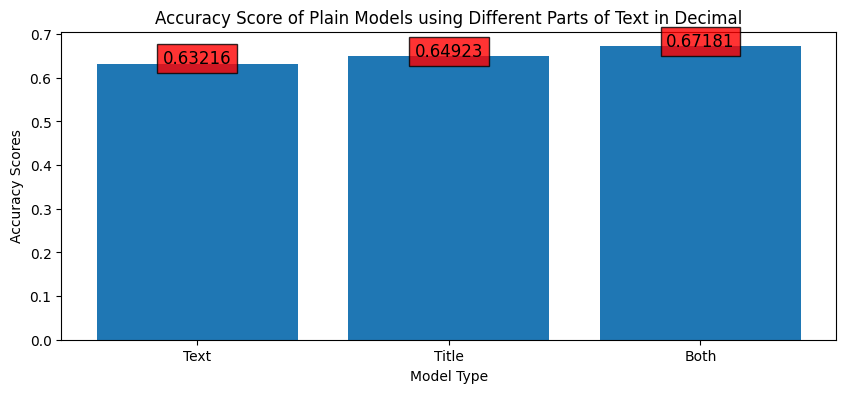

In [214]:
#Compare the Accuracy, Precision, Recall, and F1-Score of each model
import matplotlib.pyplot as plt
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center',
                 bbox = dict(facecolor = 'red', alpha =.8),
                 fontsize=12)

labels = ["Text", "Title", "Both"]
scoresAcc = [accText, accTitle, accBoth]
scoresAcc = [round(num, 5) for num in scoresAcc]

plt.figure(figsize=(10,4))
plt.bar(labels, scoresAcc)
addlabels(labels, scoresAcc)
plt.xlabel('Model Type')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Score of Plain Models using Different Parts of Text in Decimal')

Text(0.5, 1.0, 'Precision Scores of Plain Models using Different Parts of Text in Decimal')

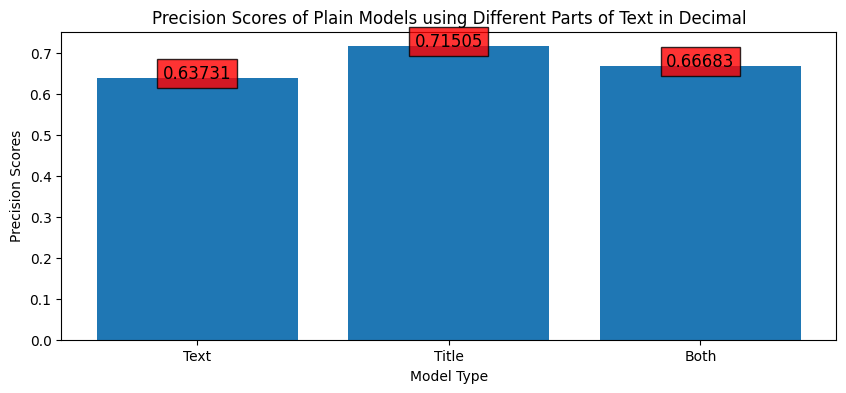

In [215]:
scoresPrec = [precText, precTitle, precBoth]
scoresPrec = [round(num, 5) for num in scoresPrec]

plt.figure(figsize=(10,4))
plt.bar(labels, scoresPrec)
addlabels(labels, scoresPrec)
plt.xlabel('Model Type')
plt.ylabel('Precision Scores')
plt.title('Precision Scores of Plain Models using Different Parts of Text in Decimal')

Text(0.5, 1.0, 'Recall Scores of Plain Models using Different Parts of Text in Decimal')

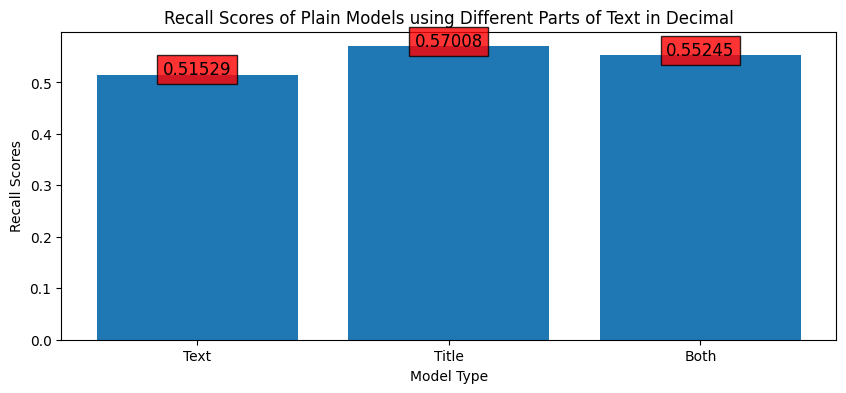

In [216]:
scoresRecall = [recallText, recallTitle, recallBoth]
scoresRecall = [round(num, 5) for num in scoresRecall]

plt.figure(figsize=(10,4))
plt.bar(labels, scoresRecall)
addlabels(labels, scoresRecall)
plt.xlabel('Model Type')
plt.ylabel('Recall Scores')
plt.title('Recall Scores of Plain Models using Different Parts of Text in Decimal')

Text(0.5, 1.0, 'F1-Scores of Plain Models using Different Parts of Text in Decimal')

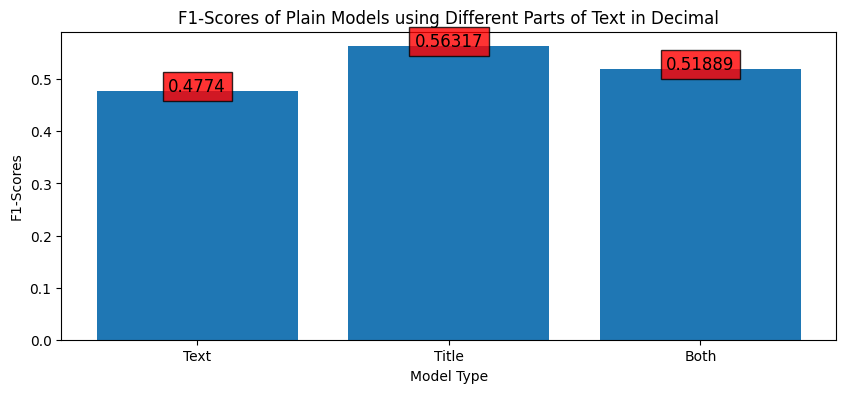

In [217]:
scoresF1 = [f1Text, f1Title, f1Both]
scoresF1 = [round(num, 5) for num in scoresF1]

plt.figure(figsize=(10,4))
plt.bar(labels, scoresF1)
addlabels(labels, scoresF1)
plt.xlabel('Model Type')
plt.ylabel('F1-Scores')
plt.title('F1-Scores of Plain Models using Different Parts of Text in Decimal')

Although Title+Text had a higher accuracy, it lost to Title alone in all other metrics. Let's look into both of these.

In [218]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

labels = sorted(list(set(y_test)))

cm = confusion_matrix(y_test, y_pred, labels=labels)
print(labels)
print(cm)

['anger', 'anxiety', 'bipolar', 'depression', 'eating disorder', 'panic']
[[ 18   0 161  10   3   9]
 [  0   0  87  10   6  65]
 [  0   0 417   6   5   6]
 [  0   0 164 116  11  10]
 [  0   0  16   0 343   3]
 [  0   0  21   0   3 326]]


In [219]:
#Calculate error rates by dividing the number of misclassified instances in each label
  #by total number of instances of that label

erates = {}
for i, label in enumerate(labels):
    total_instances = np.sum(cm[i, :])
    errors = np.sum(cm[i, :]) - cm[i, i]
    err = errors / total_instances if total_instances > 0 else 0
    erates[label] = err

In [220]:
#Display
for label, err in erates.items():
        print(f"Error rate for label {label}: {err:.2f}")

Error rate for label anger: 0.91
Error rate for label anxiety: 1.00
Error rate for label bipolar: 0.04
Error rate for label depression: 0.61
Error rate for label eating disorder: 0.05
Error rate for label panic: 0.07


Text(0.5, 1.0, 'Title+Text: Error Rate Predicting each Label in Decimal')

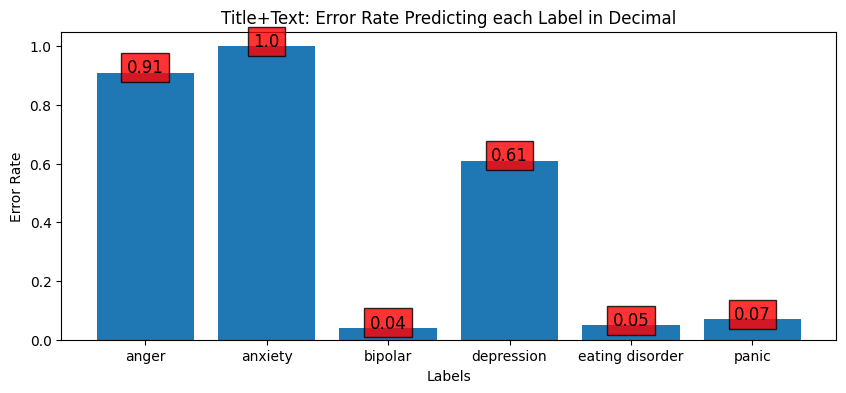

In [221]:
labels = list(erates.keys())
errPlain = [round(num, 2) for num in list(erates.values())]

plt.figure(figsize=(10,4))
plt.bar(labels, errPlain)
addlabels(labels, errPlain)
plt.xlabel('Labels')
plt.ylabel('Error Rate')
plt.title('Title+Text: Error Rate Predicting each Label in Decimal')

Text(0.5, 1.0, 'Title: Error Rate Predicting each Label in Decimal')

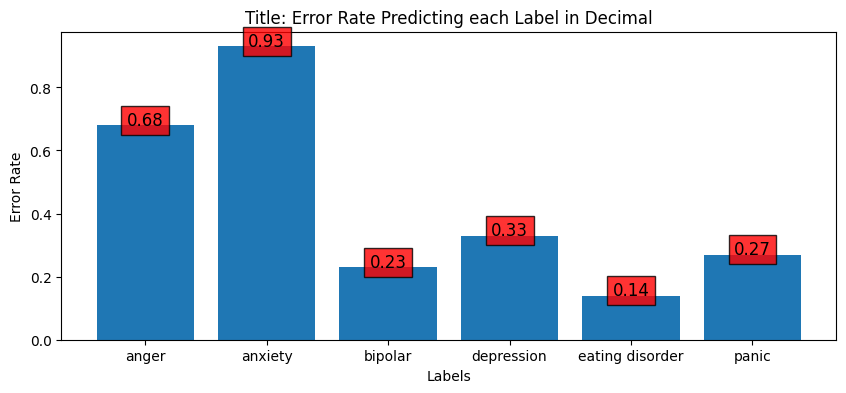

In [222]:
#Create the Text model again
X_train, X_test, y_train, y_test = train_test_split(df['Title_pro'], df['Topic'], test_size=0.2, random_state=2)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=labels)

erates = {}
for i, label in enumerate(labels):
    total_instances = np.sum(cm[i, :])
    errors = np.sum(cm[i, :]) - cm[i, i]
    err = errors / total_instances if total_instances > 0 else 0
    erates[label] = err
labels = list(erates.keys())
errPlainText = [round(num, 2) for num in list(erates.values())]

plt.figure(figsize=(10,4))
plt.bar(labels, errPlainText)
addlabels(labels, errPlainText)
plt.xlabel('Labels')
plt.ylabel('Error Rate')
plt.title('Title: Error Rate Predicting each Label in Decimal')

Title+Text seems to have higher highs and lower lows compared to Title.

# Optimization

Tuning alpha value. Higher prevents overfitting but may reduce accuracy. GridSearchCV can find the optimal value.

In [223]:
# Following https://sklearner.com/scikit-learn-grid-search-multinomialnb/
from sklearn.model_selection import GridSearchCV

#define a parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
}

#Continuing with Title+pro
grid_search = GridSearchCV(estimator=MultinomialNB(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)

# Report best score and parameters
print(f"Best score: {grid_search.best_score_:.3f}")
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate on test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Test set accuracy: {accuracy:.3f}")

Best score: 0.658
Best parameters: {'alpha': 1.0, 'fit_prior': False}
Test set accuracy: 0.670


In [224]:
#Test again
clf = MultinomialNB(alpha=grid_search.best_params_["alpha"], fit_prior=grid_search.best_params_["fit_prior"])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accTitleOpt = accuracy_score(y_test, y_pred)
precTitleOpt = np.average(precision_score(y_test, y_pred, average=None))
recallTitleOpt = np.average(recall_score(y_test, y_pred, average=None))
f1TitleOpt = np.average(f1_score(y_test, y_pred, average=None))
print("Accuracy:", accTitleOpt)
print("Precision Average:", precTitleOpt)
print("Recall Average:", recallTitleOpt)
print("F1-Score Average:", f1TitleOpt)

Accuracy: 0.6696035242290749
Precision Average: 0.6534909735800609
Recall Average: 0.6380214512593189
F1-Score Average: 0.6407601310934127


70% accuracy is the industry standard minimum, how about optimizing for Title+Text?

In [225]:
#Test again
X_train, X_test, y_train, y_test = train_test_split(df['T_T_pro'], df['Topic'], test_size=0.2, random_state=2)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

grid_search = GridSearchCV(estimator=MultinomialNB(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

clf = MultinomialNB(alpha=grid_search.best_params_["alpha"], fit_prior=grid_search.best_params_["fit_prior"])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accBothOpt = accuracy_score(y_test, y_pred)
precBothOpt = np.average(precision_score(y_test, y_pred, average=None))
recallBothOpt = np.average(recall_score(y_test, y_pred, average=None))
f1BothOpt = np.average(f1_score(y_test, y_pred, average=None))

print("Accuracy:", accBothOpt)
print("Precision Average:", precBothOpt)
print("Recall Average:", recallBothOpt)
print("F1-Score Average:", f1BothOpt)

Best parameters: {'alpha': 0.1, 'fit_prior': False}
Accuracy: 0.8127753303964758
Precision Average: 0.8041805133395793
Recall Average: 0.7668751713701297
F1-Score Average: 0.7693428837330497


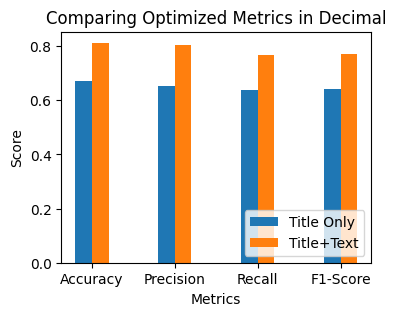

In [226]:
labels = ["Accuracy", "Precision", "Recall", "F1-Score"]
x = [accTitleOpt, precTitleOpt, recallTitleOpt, f1TitleOpt]
y = [accBothOpt, precBothOpt, recallBothOpt, f1BothOpt]

X_axis = np.arange(len(labels))
width = 0.2

plt.figure(figsize=(4,3))
plt.bar(X_axis - width/2, x, width, label = 'Title Only')
plt.bar(X_axis + width/2, y, width, label = 'Title+Text')

plt.xticks(X_axis, labels)
plt.xlabel("Metrics")
plt.ylabel('Score')
plt.title('Comparing Optimized Metrics in Decimal')
plt.legend(loc='lower right')
plt.show()

After optimization Title and Text combined give much higher scores in each category

Text(0.5, 1.0, 'Error Rate Predicting each Label in Decimal')

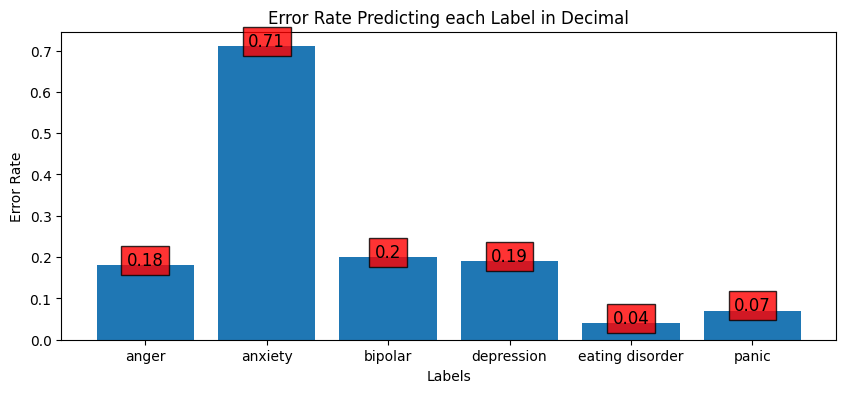

In [227]:
#Visualize
labels = sorted(list(set(y_test)))
cm = confusion_matrix(y_test, y_pred, labels=labels)

erates = {}
for i, label in enumerate(labels):
    total_instances = np.sum(cm[i, :])
    errors = np.sum(cm[i, :]) - cm[i, i]
    err = errors / total_instances if total_instances > 0 else 0
    erates[label] = err

labels = list(erates.keys())
errOpt = [round(num, 2) for num in list(erates.values())]

plt.figure(figsize=(10,4))
plt.bar(labels, errOpt)
addlabels(labels, errOpt)
plt.xlabel('Labels')
plt.ylabel('Error Rate')
plt.title('Error Rate Predicting each Label in Decimal')

['anger', 'anxiety', 'bipolar', 'depression', 'eating disorder', 'panic']


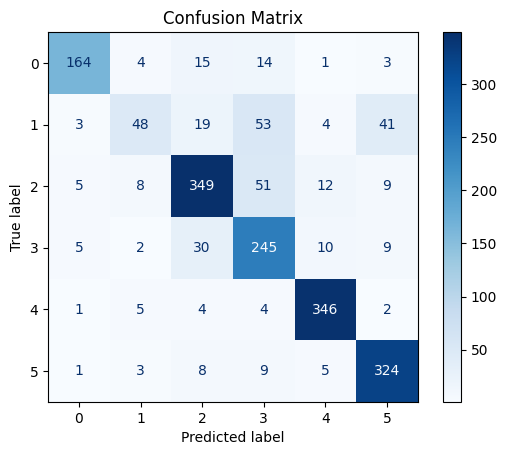

In [228]:
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Remove Common Words

In [229]:
#Remove most common words
df_com = df.copy()
print(df_com['T_T_pro'])

0       anger may caused magnesium deficiency neuron l...
1       ever get angry wish kill moment dont know ange...
2       anyone else avoid people know theyll make angr...
3       anyone else allowed get upset growing always s...
4       wish people understood outburst dont happen sm...
                              ...                        
9073    fastest way ive found get panic attack control...
9074    looking advice hi im f ive professionally diag...
9075    new panic attack experience hi guy wanted see ...
9076    im pretty bad suicidal thought thinking cant h...
9077    anxiety symptom replicating low blood sugar sc...
Name: T_T_pro, Length: 9078, dtype: object


In [230]:
common = ['im', 'like', 'feel', 'dont', 'get' 'time', 'know', 'ive', 'people',
          'day', 'want', 'thing', 'even', 'one', 'life', 'year', 'really', 'make']
for word in common:
  df_com['T_T_pro'] = df_com['T_T_pro'].str.replace(word, '', regex=False)

print(df_com['T_T_pro'])

0       anger may caused magnesium deficiency neuron l...
1       ever get angry wish kill moment   anger issue ...
2       any else avoid   theyll  angry lately  noticin...
3       any else allowed get upset growing always scol...
4       wish  understood outburst  happen small issue ...
                              ...                        
9073    fastest way  found get panic attack control us...
9074    looking advice hi  f  professionally diagnosed...
9075    new panic attack experience hi guy ed see any ...
9076     pretty bad suicidal thought thinking cant han...
9077    anxiety symptom replicating low blood sugar sc...
Name: T_T_pro, Length: 9078, dtype: object


In [231]:
#Model Again
X_train, X_test, y_train, y_test = train_test_split(df_com['T_T_pro'], df_com['Topic'], test_size=0.2, random_state=2)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accCom = accuracy_score(y_test, y_pred)
precCom = np.average(precision_score(y_test, y_pred, average=None))
recallCom = np.average(recall_score(y_test, y_pred, average=None))
f1Com = np.average(f1_score(y_test, y_pred, average=None))
print("Accuracy:", accCom)
print("Precision Average:", precCom)
print("Recall Average:", recallCom)
print("F1-Score Average:", f1Com)

Accuracy: 0.6718061674008811
Precision Average: 0.6624573212237092
Recall Average: 0.5555598216917689
F1-Score Average: 0.5264562241586658


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [232]:
#Optimize
grid_search = GridSearchCV(estimator=MultinomialNB(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best score: {grid_search.best_score_:.3f}")
print(f"Best parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Test set accuracy: {accuracy:.3f}")

Best score: 0.798
Best parameters: {'alpha': 0.1, 'fit_prior': False}
Test set accuracy: 0.814


In [233]:
#Model with optimized parameters
clf = MultinomialNB(alpha=grid_search.best_params_["alpha"], fit_prior=grid_search.best_params_["fit_prior"])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accOptCom = accuracy_score(y_test, y_pred)
precOptCom = np.average(precision_score(y_test, y_pred, average=None))
recallOptCom = np.average(recall_score(y_test, y_pred, average=None))
f1OptCom = np.average(f1_score(y_test, y_pred, average=None))
print("Accuracy:", accOptCom)
print("Precision Average:", precOptCom)
print("Recall Average:", recallOptCom)
print("F1-Score Average:", f1OptCom)

Accuracy: 0.8138766519823789
Precision Average: 0.8070721222672859
Recall Average: 0.769834988705416
F1-Score Average: 0.7743251744739528


['anger', 'anxiety', 'bipolar', 'depression', 'eating disorder', 'panic']
[[164   3  15  15   1   3]
 [  3  53  18  49   5  40]
 [  4   9 351  48  13   9]
 [  4   2  33 240  12  10]
 [  1   5   5   4 346   1]
 [  1   4   9   7   5 324]]


Text(0.5, 1.0, 'Error Rate Predicting each Label in Decimal')

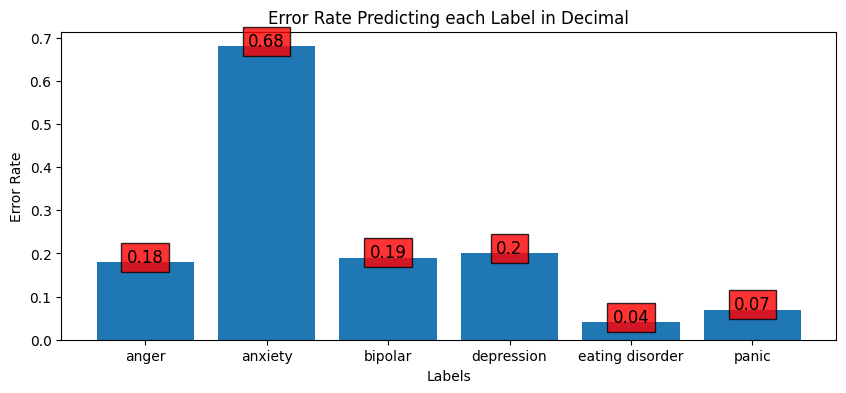

In [234]:
#Visualize
cm = confusion_matrix(y_test, y_pred, labels=labels)
print(labels)
print(cm)

erates = {}
for i, label in enumerate(labels):
    total_instances = np.sum(cm[i, :])
    errors = np.sum(cm[i, :]) - cm[i, i]
    err = errors / total_instances if total_instances > 0 else 0
    erates[label] = err

labels = list(erates.keys())
errCom = [round(num, 2) for num in list(erates.values())]

plt.figure(figsize=(10,4))
plt.bar(labels, errCom)
addlabels(labels, errCom)
plt.xlabel('Labels')
plt.ylabel('Error Rate')
plt.title('Error Rate Predicting each Label in Decimal')

Text(0.5, 1.0, 'Accuracy of the Models in Decimal')

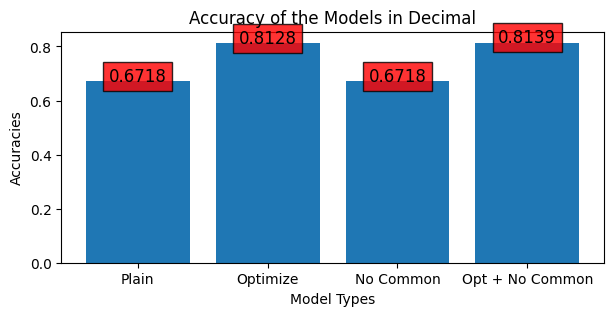

In [235]:
labels = ["Plain", "Optimize", "No Common", "Opt + No Common"]
accuracies = [accCom, accBothOpt, accCom, accOptCom]
accuracies = [round(num, 4) for num in accuracies]

plt.figure(figsize=(7,3))
plt.bar(labels, accuracies)
addlabels(labels, accuracies)
plt.xlabel('Model Types')
plt.ylabel('Accuracies')
plt.title('Accuracy of the Models in Decimal')

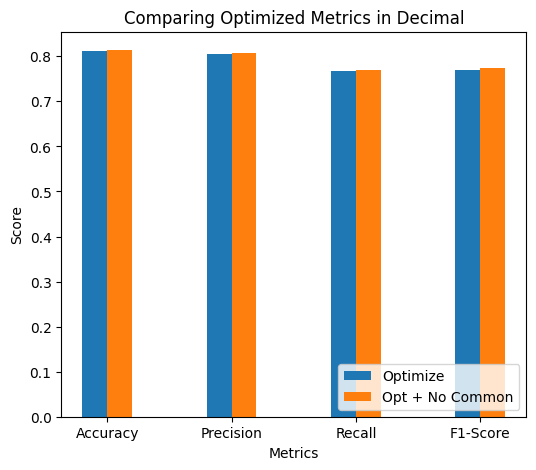

In [236]:
labels = ["Accuracy", "Precision", "Recall", "F1-Score"]
x = [accBothOpt, precBothOpt, recallBothOpt, f1BothOpt]
y = [accOptCom, precOptCom, recallOptCom, f1OptCom]

X_axis = np.arange(len(labels))
width = 0.2

plt.figure(figsize=(6,5))
plt.bar(X_axis - width/2, x, width, label = 'Optimize')
plt.bar(X_axis + width/2, y, width, label = 'Opt + No Common')

plt.xticks(X_axis, labels)
plt.xlabel("Metrics")
plt.ylabel('Score')
plt.title('Comparing Optimized Metrics in Decimal')
plt.legend(loc='lower right')
plt.show()

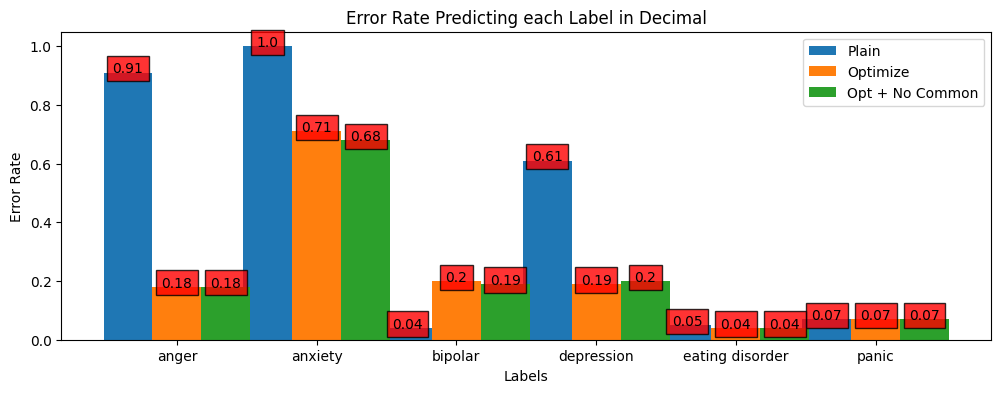

In [237]:
#Display All
labels = sorted(list(set(y_test)))
def speclabels(x,y):
    for i in range(len(labels)):
        plt.text(i+x,y[i],y[i], ha='center',
                 bbox = dict(facecolor = 'red', alpha =.8))

X_axis = np.arange(len(labels))

plt.figure(figsize=(12,4))
plt.bar(X_axis - 0.35, errPlain, 0.35, label = 'Plain')
plt.bar(X_axis, errOpt, 0.35, label = 'Optimize')
plt.bar(X_axis + 0.35, errCom, 0.35, label = 'Opt + No Common')

plt.xticks(X_axis, labels)
speclabels(-0.35, errPlain)
speclabels(0, errOpt)
speclabels(0.35, errCom)
plt.xlabel("Labels")
plt.ylabel('Error Rate')
plt.title('Error Rate Predicting each Label in Decimal')
plt.legend()
plt.show()

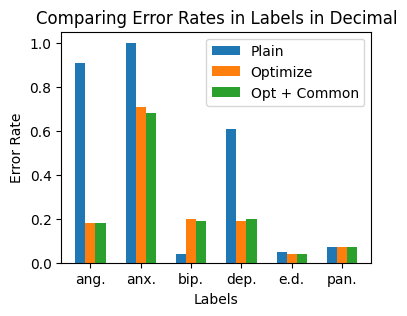

In [238]:
labels = ["ang.", "anx.", "bip.", "dep.", "e.d.", "pan."]
x = errPlain
y = errOpt
z = errCom

plt.figure(figsize=(4,3))
plt.bar(X_axis - width, x, width, label = 'Plain', color='#1F77B4')
plt.bar(X_axis, y, width, label = 'Optimize', color='#FF7F0E')
plt.bar(X_axis + width, z, width, label = 'Opt + Common', color='#2CA02C')

plt.xticks(X_axis, labels)
plt.xlabel("Labels")
plt.ylabel('Error Rate')
plt.title('Comparing Error Rates in Labels in Decimal')
plt.legend(loc='upper right')
plt.show()